# HW1_Q6_Chami

## Create dataset 

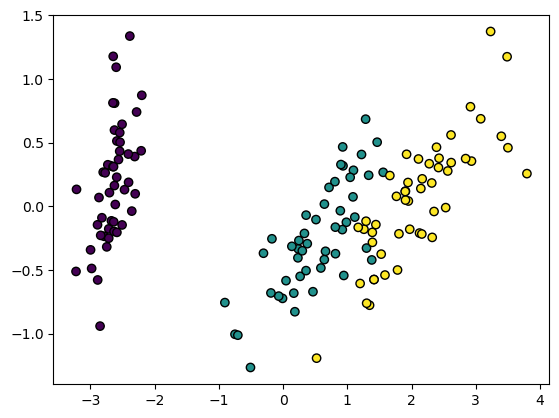

In [32]:
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.decomposition import PCA
import numpy as np

iris = datasets.load_iris()
Xorig = iris.data
y = iris.target
pca = PCA(n_components=2)
X = pca.fit(Xorig).transform(Xorig)
plt.scatter(X[:, 0], X[:, 1], marker='o', c=y, edgecolor='k')

## a) Mean & Covariance

In [33]:
mask = (y==1) | (y==2)
data = X[mask]
classes = y[mask]

# means
mu1 = data[classes==1].mean(axis=0)
mu2 = data[classes==2].mean(axis=0)
print("Mean of class 1:", mu1)
print("Mean of class 2:", mu2)

# convariance
cov1 = np.cov(data[classes==1].T, bias = True)
cov2 = np.cov(data[classes==2].T, bias = True)

# pooling covariances
sigma = (len(data[classes==1]) * cov1 + len(data[classes==2]) * cov2) / len(data) 

print("Covariance of class 1:\n", cov1)
print("\nCovariance of class 2:\n", cov2)
print("\nShared covariance matrix (Σ):\n", sigma)

Mean of class 1: [ 0.53320657 -0.24554983]
Mean of class 2: [2.10920889 0.05466479]
Covariance of class 1:
 [[0.34836155 0.19476732]
 [0.19476732 0.18146878]]

Covariance of class 2:
 [[0.48832634 0.27033776]
 [0.27033776 0.22862663]]

Shared covariance matrix (Σ):
 [[0.41834394 0.23255254]
 [0.23255254 0.20504771]]


## b) discriminant function

In [23]:
def g_val(x, mu, sigma, prior):
    d = x - mu
    Sigma_inv = np.linalg.inv(sigma)
    return -0.5 * np.einsum("ij,ij->i", d @ Sigma_inv, d) + np.log(prior)

## c) plot classification regions

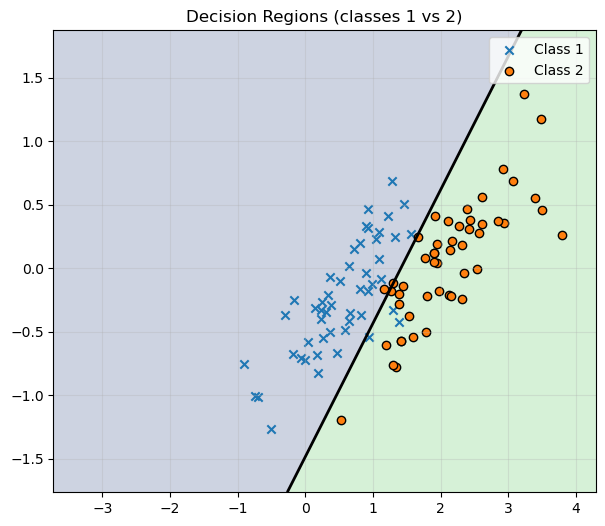

In [57]:
# priors 
pi1 = np.sum(classes==1) / len(classes)
pi2 = np.sum(classes==2) / len(classes)

x_min, x_max = data[:,0].min() - 0.5, data[:,0].max() + 0.5
y_min, y_max = data[:,1].min() - 0.5, data[:,1].max() + 0.5

xx, yy = np.meshgrid(np.linspace(x_min, x_max, 400),
                     np.linspace(y_min, y_max, 400))

grid = np.c_[xx.ravel(), yy.ravel()]

g1 = g_val(grid, mu1, sigma, pi1)
g2 = g_val(grid, mu2, sigma, pi2)

region = np.where(g1 > g2, 1, 2).reshape(xx.shape)


plt.figure(figsize=(7,6))
plt.contourf(xx, yy, region, levels=[0.5,1.5,2.5], alpha=0.25)

# Decision boundary
plt.contour(xx, yy, (g1 - g2).reshape(xx.shape),
            levels=[0], colors='k', linewidths=2)

plt.scatter(data[classes==1][:,0], data[classes==1][:,1],
            marker='x', label='Class 1')
plt.scatter(data[classes==2][:,0], data[classes==2][:,1],
            marker='o', label='Class 2', edgecolor='k')

plt.title("Decision Regions (classes 1 vs 2)")
plt.legend()
plt.grid(alpha=0.3)
plt.show()

## d) Decision boundary

In [58]:
invSigma = np.linalg.inv(sigma)

# weight vector
w = invSigma @ (mu1 - mu2)

# bias term (scalar)
b = -0.5 * (mu1.T @ invSigma @ mu1 - mu2.T @ invSigma @ mu2) + np.log(pi1 / pi2)

print("w (decision boundary vector):", w)
print("b (decision boundary bias):", b)


w (decision boundary vector): [-7.99185295  7.59974902]
b (decision boundary bias): 11.284237127360154


## e) Effect of prior distribution

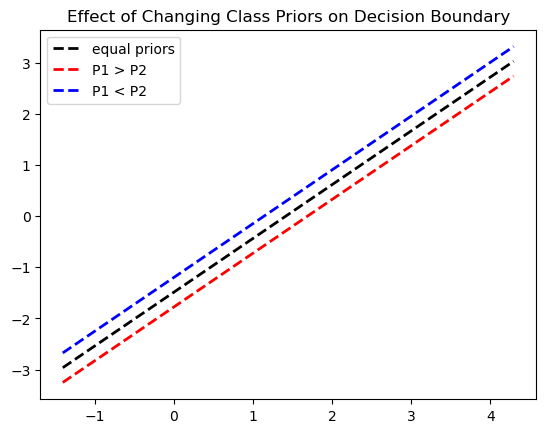

In [6]:
priors = [
    (0.5, 0.5),
    (0.9, 0.1),
    (0.1, 0.9)
]

colors = ['k--', 'r--', 'b--']
labels = ['equal priors', 'P1 > P2', 'P1 < P2']

for (p1, p2), col, lab in zip(priors, colors, labels):
    b_new = -0.5 * (mu1.T @ invSigma @ mu1 - mu2.T @ invSigma @ mu2) + np.log(p1 / p2)

    x_line = np.linspace(xx.min(), xx.max(), 300)
    y_line = -(w[0] * x_line + b_new) / w[1]

    plt.plot(x_line, y_line, col, linewidth=2, label=lab)

plt.legend()
plt.title("Effect of Changing Class Priors on Decision Boundary")
plt.show()


## f) Repeat for 3 classes

### a) Mean & Covariance

In [59]:
data = X
classes = y

# mean
mu0 = data[classes==0].mean(axis=0)
mu1 = data[classes==1].mean(axis=0)
mu2 = data[classes==2].mean(axis=0)

print("Mean of class 0:", mu0)
print("Mean of class 1:", mu1)
print("Mean of class 2:", mu2)

# covariances
cov0 = np.cov(data[classes==0].T, bias=True)
cov1 = np.cov(data[classes==1].T, bias=True)
cov2 = np.cov(data[classes==2].T, bias=True)

print("\nCovariance of class 0:\n", cov0)
print("\nCovariance of class 1:\n", cov1)
print("\nCovariance of class 2:\n", cov2)


Mean of class 0: [-2.64241546  0.19088505]
Mean of class 1: [ 0.53320657 -0.24554983]
Mean of class 2: [2.10920889 0.05466479]

Covariance of class 0:
 [[0.0480415  0.05492185]
 [0.05492185 0.21334336]]

Covariance of class 1:
 [[0.34836155 0.19476732]
 [0.19476732 0.18146878]]

Covariance of class 2:
 [[0.48832634 0.27033776]
 [0.27033776 0.22862663]]


### b) discriminant function

In [60]:
def g_val(x, mu, sigma, prior):
    d = x - mu
    Sigma_inv = np.linalg.inv(sigma)
    term = -0.5 * np.einsum("ij,ij->i", d @ Sigma_inv, d)
    det_term = -0.5 * np.log(np.linalg.det(Sigma_inv))
    prior_term = np.log(prior)
    return term + det_term + prior_term


### c) plot classification regions

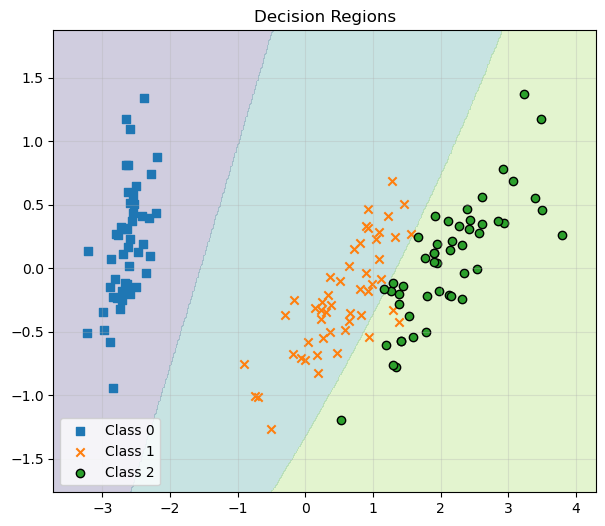

In [61]:
# prior
pi0 = np.sum(classes==0) / len(classes)
pi1 = np.sum(classes==1) / len(classes)
pi2 = np.sum(classes==2) / len(classes)

# grid range
x_min, x_max = data[:,0].min() - 0.5, data[:,0].max() + 0.5
y_min, y_max = data[:,1].min() - 0.5, data[:,1].max() + 0.5

xx, yy = np.meshgrid(np.linspace(x_min, x_max, 400),
                     np.linspace(y_min, y_max, 400))

grid = np.c_[xx.ravel(), yy.ravel()]

g0 = g_val(grid, mu0, cov0, pi0)
g1 = g_val(grid, mu1, cov1, pi1)
g2 = g_val(grid, mu2, cov2, pi2)


g_stack = np.vstack([g0, g1, g2]) 
region = np.argmax(g_stack, axis=0).reshape(xx.shape)


plt.figure(figsize=(7,6))
plt.contourf(xx, yy, region, levels=[-0.5,0.5,1.5,2.5], alpha=0.25)

plt.scatter(data[classes==0][:,0], data[classes==0][:,1],
            marker='s', label='Class 0')
plt.scatter(data[classes==1][:,0], data[classes==1][:,1],
            marker='x', label='Class 1')
plt.scatter(data[classes==2][:,0], data[classes==2][:,1],
            marker='o', label='Class 2', edgecolor='k')

plt.title("Decision Regions")
plt.legend()
plt.grid(alpha=0.3)
plt.show()

## i) Repeat f: split data

### data split

In [53]:
# data split
def train_test_split_per_class(X, y, cls, train_ratio=0.8):
    idx = np.where(y == cls)[0]
    np.random.shuffle(idx)
    k = int(len(idx) * train_ratio)
    return idx[:k], idx[k:]

train_idx = []
test_idx  = []

for c in [0,1,2]:
    tr, ts = train_test_split_per_class(X, y, c, train_ratio=0.8)
    train_idx.append(tr)
    test_idx.append(ts)

train_idx = np.concatenate(train_idx)
test_idx  = np.concatenate(test_idx)

X_train = X[train_idx]
y_train = y[train_idx]

X_test  = X[test_idx]
y_test  = y[test_idx]

### a) Mean & Covariance

In [54]:
mus = {}
covs = {}
priors = {}

for c in [0,1,2]:
    Xc = X_train[y_train == c]
    mus[c] = Xc.mean(axis=0)
    covs[c] = np.cov(Xc.T, bias=True)
    priors[c] = len(Xc) / len(X_train)

print("Mean of class 0:", mus[0])
print("Mean of class 1:", mus[1])
print("Mean of class 2:", mus[2])

print("\nCovariance of class 0:\n", covs[0])
print("\nCovariance of class 1:\n", covs[1])
print("\nCovariance of class 2:\n", covs[2])

Mean of class 0: [-2.66178578  0.20459189]
Mean of class 1: [ 0.5257076  -0.24090648]
Mean of class 2: [2.15911574 0.09059508]

Covariance of class 0:
 [[0.04232167 0.04429043]
 [0.04429043 0.21566504]]

Covariance of class 1:
 [[0.33310448 0.19118437]
 [0.19118437 0.19830415]]

Covariance of class 2:
 [[0.51219621 0.26034835]
 [0.26034835 0.20508405]]


### c) plot classification regions

In [55]:
def g_with_reject(x, mus, covs, priors, lambd):
    x = np.atleast_2d(x)
    K = len(mus)

    G = []  # list of g_k for each class

    for c in range(K):
        mu = mus[c]
        Sigma = covs[c]
        prior = priors[c]

        d = x - mu
        invS = np.linalg.inv(Sigma)
        
        quad = -0.5 * np.einsum("ij,ij->i", d @ invS, d)
        det_term = -0.5 * np.log(np.linalg.det(Sigma))
        prior_term = np.log(prior)

        g = quad + det_term + prior_term
        G.append(g)

    G = np.vstack(G)  

    g_max = np.max(G, axis=0)
    classes = np.argmax(G, axis=0)

    # rejection
    classes[g_max < lambd] = 3    # 3 = reject class

    return classes, G


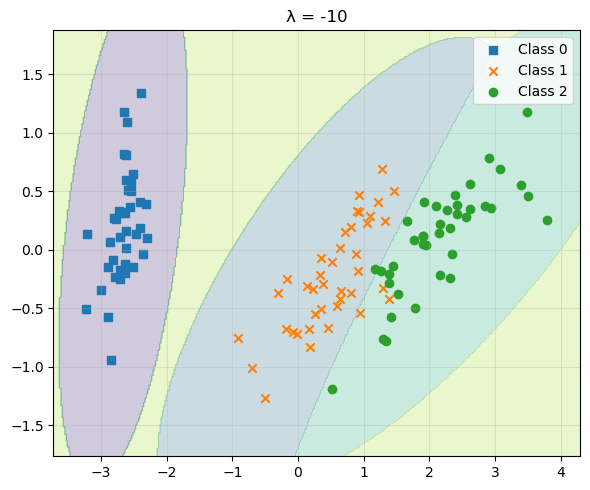

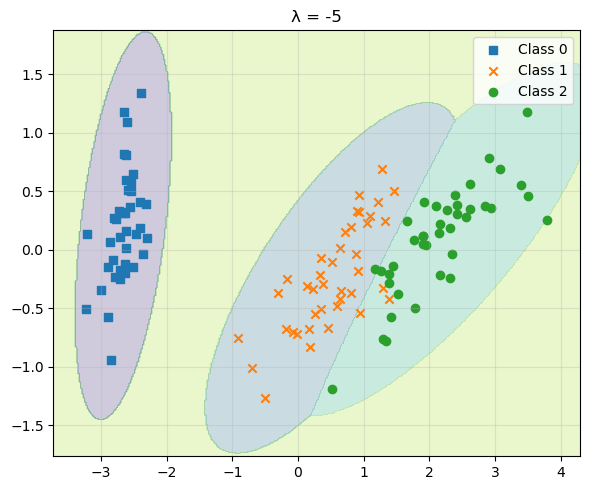

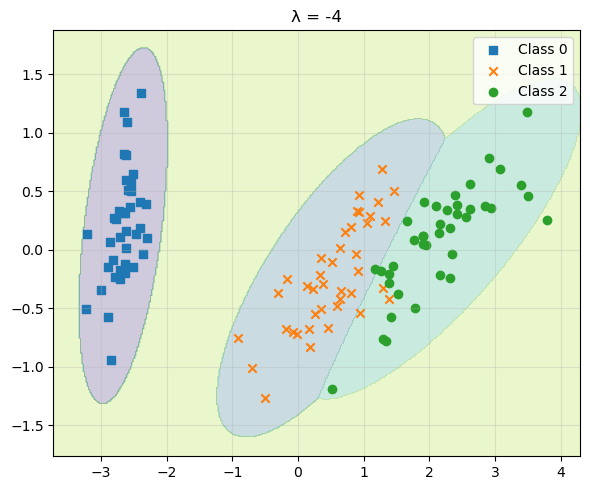

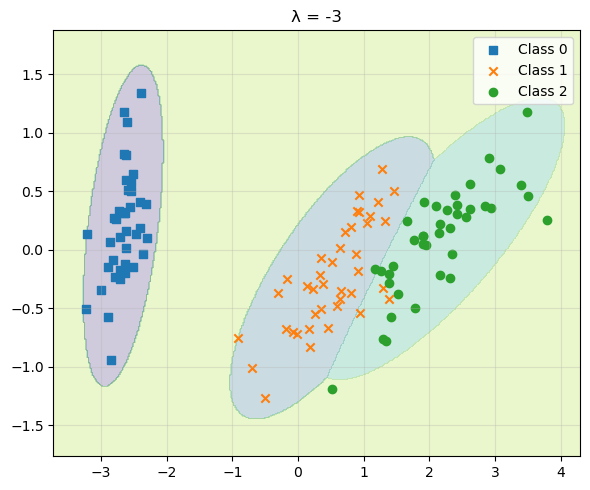

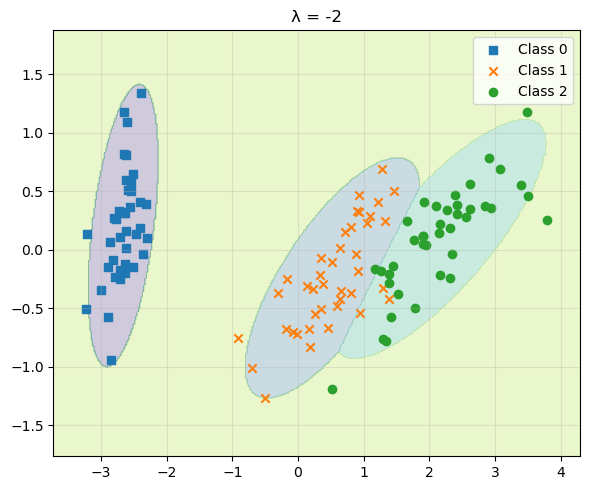

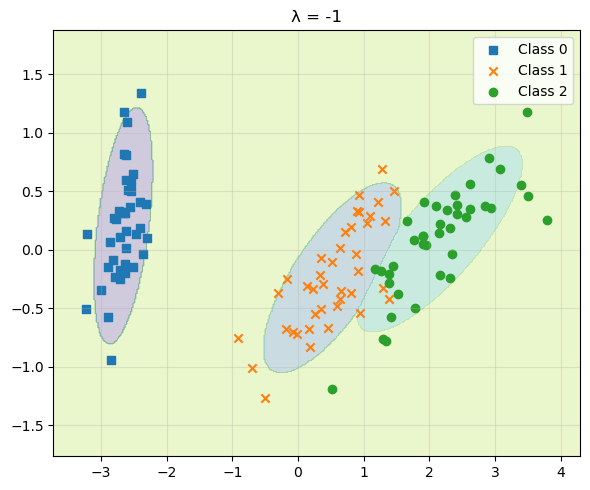

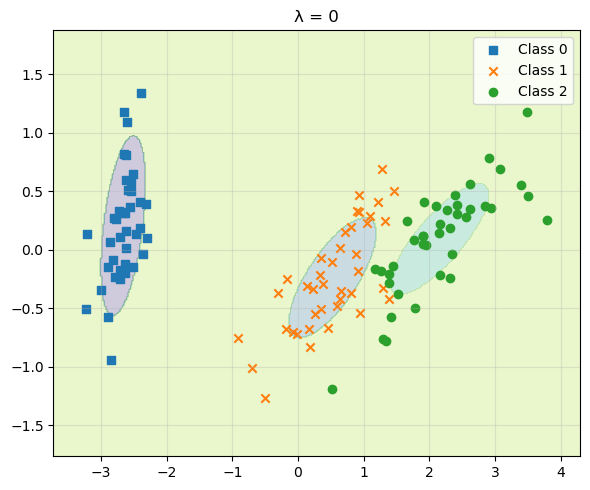

In [62]:
x_min, x_max = X[:,0].min() - 0.5, X[:,0].max() + 0.5
y_min, y_max = X[:,1].min() - 0.5, X[:,1].max() + 0.5

xx, yy = np.meshgrid(np.linspace(x_min, x_max, 400),
                     np.linspace(y_min, y_max, 400))

grid = np.c_[xx.ravel(), yy.ravel()]

lambda_values = [-10, -5, -4, -3, -2, -1, 0]

for lam in lambda_values:

    labels, G = discriminant_with_reject(grid, mus, covs, priors, lam)

    region = labels.reshape(xx.shape)

    plt.figure(figsize=(6, 5))
    plt.contourf(xx, yy, region,
                 levels=[-0.5, 0.5, 1.5, 2.5, 3.5],
                 alpha=0.25)

    plt.scatter(X_train[y_train==0][:,0], X_train[y_train==0][:,1],
                marker='s', label='Class 0')
    plt.scatter(X_train[y_train==1][:,0], X_train[y_train==1][:,1],
                marker='x', label='Class 1')
    plt.scatter(X_train[y_train==2][:,0], X_train[y_train==2][:,1],
                marker='o', label='Class 2')

    plt.title(f"λ = {lam}")
    plt.grid(alpha=0.3)
    plt.legend()
    plt.tight_layout()
    plt.show()
